In [5]:
!pip install numpy scikit-learn pandas matplotlib

In [ ]:
Task Checklist (Copy this into your notebook too):
 Load dataset

 Clean missing Age with mean

 Encode Sex (0 = male, 1 = female)

 Select features: Pclass, Sex, Age, Fare

 Train-test split

 Train DecisionTreeClassifier

 Limit max_depth=3

 Predict + score

 Visualize tree with plot_tree

 (Optional) Display rules with export_text

In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
df = pd.read_csv("Titanic-Dataset.csv")

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df['Age']=df['Age'].fillna(df.Age.mean())

In [18]:
df["Sex"] =df["Sex"].map({"male":0,"female":1})

In [21]:
x=df[["Pclass", "Sex", "Age", "Fare"]]
y=df['Survived']

In [33]:
features=["Pclass", "Sex", "Age", "Fare"]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
Model = DecisionTreeClassifier(max_depth=3,random_state=40)

In [31]:
Model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

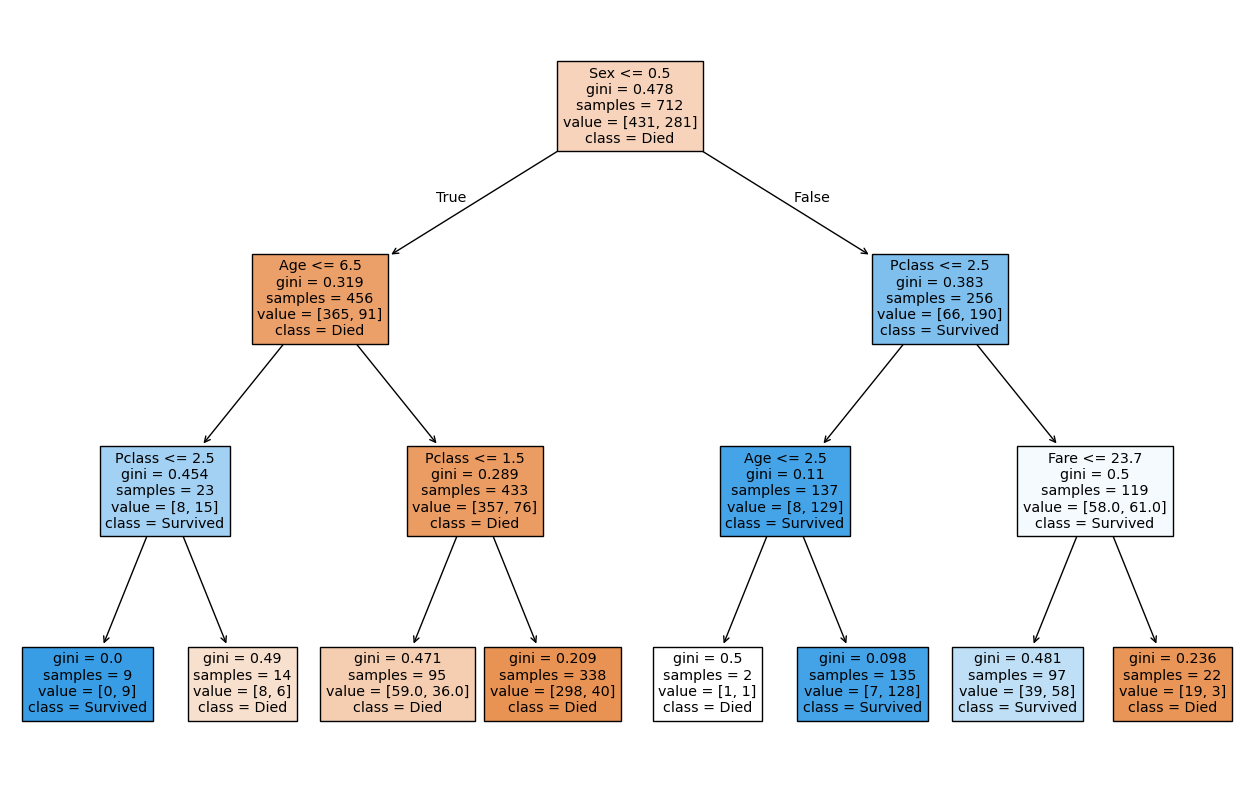

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(Model, feature_names=features, class_names=["Died", "Survived"], filled=True)
plt.show()


In [36]:
from sklearn.tree import export_text
tree_rules = export_text(Model, feature_names=features)
print(tree_rules)


|--- Sex <= 0.50
|   |--- Age <= 6.50
|   |   |--- Pclass <= 2.50
|   |   |   |--- class: 1
|   |   |--- Pclass >  2.50
|   |   |   |--- class: 0
|   |--- Age >  6.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.70
|   |   |   |--- class: 1
|   |   |--- Fare >  23.70
|   |   |   |--- class: 0



In [39]:
y_pred = Model.predict(x_test)

In [40]:
accuracy  =accuracy_score(y_test,y_pred)

In [41]:
print(f"accuracy{accuracy}")

accuracy0.8435754189944135
